<a href="https://colab.research.google.com/github/beniamine3155/deep_learning_tensorflow/blob/main/neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification with TensorFlow

In [2]:
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

In [3]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# create circles
X, Y = make_circles(n_samples, noise = 0.03, random_state = 42)



In [4]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
Y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [6]:
# make dataFrame as features and labels
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1":X[:, 1], "label":Y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [7]:
# check out the different labels
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

There are two labels one is 0 and another is 1. So, this is a problem of binary classification.

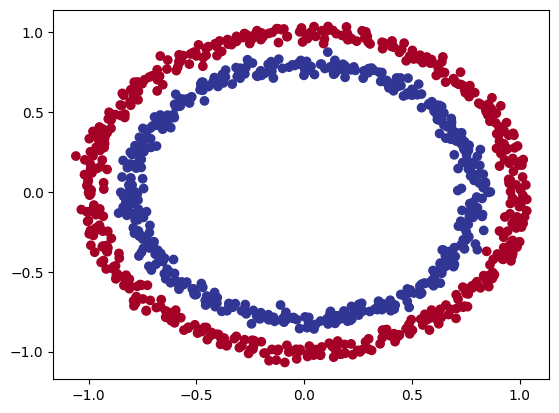

In [8]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap = plt.cm.RdYlBu)

## Input and Output Shapes

In [9]:
X.shape, Y.shape

((1000, 2), (1000,))

In [10]:
# check the how many samples
len(X), len(Y)

(1000, 1000)

In [11]:
# first examples of features and labes
X[0], Y[0]

(array([0.75424625, 0.23148074]), 1)

## Creating a model

In [12]:
# set random seed
tf.random.set_seed(42)

# create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# fit the model
model_1.fit(X, Y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 4s 3ms/step - loss: 7.0465 - accuracy: 0.4340
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 7.8873 - accuracy: 0.4570
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 7.8757 - accuracy: 0.4570
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 7.8775 - accuracy: 0.4570
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 7.8508 - accuracy: 0.4600


In [13]:
# train our model for longer
model_1.fit(X, Y, epochs = 200, verbose=0)
model_1.evaluate(X, Y)



32/32 [==============================] - 0s 3ms/step - loss: 7.7536 - accuracy: 0.4780


[7.753572463989258, 0.4779999852180481]

In [14]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

model_2.fit(X, Y, epochs = 100, verbose=0)

In [15]:
model_2.evaluate(X, Y)

32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

## Improving the model

In [17]:
# set random seed
tf.random.set_seed(42)

# create a model using Sequential API with 3 layers
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model using Adam() instead of SGD()
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_3.fit(X, Y, epochs = 100, verbose=1)

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 2.8821 - accuracy: 0.4940
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 1.0667 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8281 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8010 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7814 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7649 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7513 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7401 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7308 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7227 - accuracy: 0.5000
Epoch 11/

In [18]:
import numpy as np

def plot_decision_boundary(model, X, Y):

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # make predictions using the trained model
  y_pred = model.predict(x_in)


  # check for mutli class
  if model.output_shape[-1] > 1:
    print("doing mutliclass classification")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
    print("doing binary classification")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 3ms/step
doing binary classification


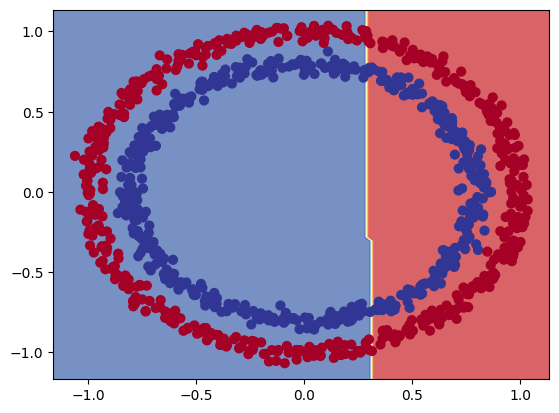

In [19]:
# Check out the predictions of our model
plot_decision_boundary(model_3, X, Y)

In [21]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int64)
      • training=True
      • mask=None


In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# setup random seed
tf.random.set_seed(42)

# recreate the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# change the loss and metrics , and compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

# fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 5ms/step - loss: 487.1094 - mae: 487.1094
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 373.9576 - mae: 373.9576
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 263.9944 - mae: 263.9944
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 148.7534 - mae: 148.7534
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 52.7322 - mae: 52.7322
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 84.5430 - mae: 84.5430
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 81.1112 - mae: 81.1112
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 49.4620 - mae: 49.4620
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 49.8645 - mae: 49.8645
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 46.5207 - mae: 46.5207
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 6ms/step


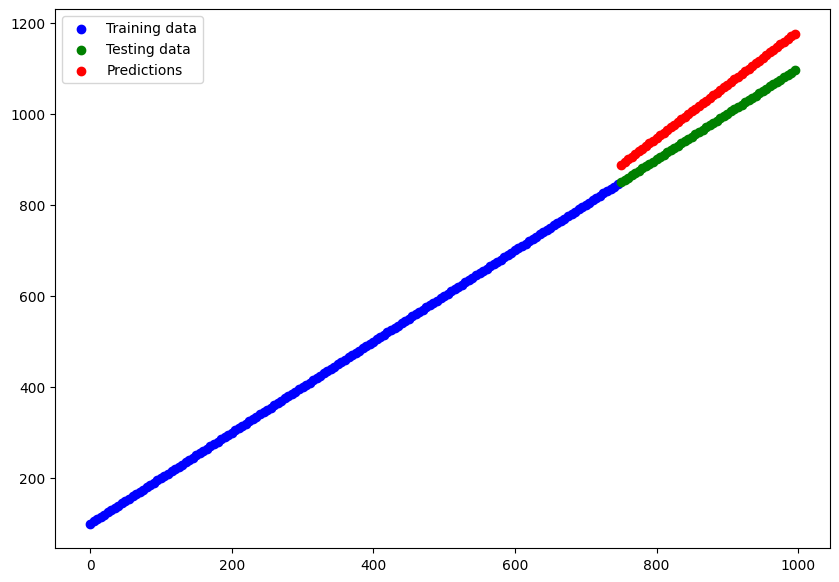

In [23]:

# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();